# Project Brief

**Our company wants to make investment in few companies and we want to have a look at the global investment trends so that we can make the investment decision wisely. Also we have to keep in mind some constraints while making the investment.**

*1. The investment should be between 5 to 15 milliion USD per round of investment.*

*2. The investment should be in only English speaking countries.*

**The Data has been taken from crunchbase.com**


## Goals of Data Analysis

*1. **Investment Type Anslysis:** Comparing typical investment amounts in venture, seed, angel, private equity etc*

*2. **Country Analysis:** We have to identify the countries which are investor's favorites and they have invested heavily in those countries.* 

*3. **Sector Analysis:** Understanding the distribution of investment among the main sectors. The 2 files 'companies' and 'rounds2' have numerous sub-sector names. Hence we will have to map each sub-sector to it's main sector.* 

# Data Cleaning

In [2]:
#making the required imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
#reading the files

rounds = pd.read_csv('rounds2.csv', encoding = 'ISO-8859-1')
companies = pd.read_csv('companies.txt', encoding = 'ISO-8859-1', sep = '\t')

In [4]:
#having a peek
rounds.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [5]:
#having a peek
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [6]:
#checking the shape
print(rounds.shape)
print('\n')
print(companies.shape)

(114949, 6)


(66368, 10)


In [7]:
#having a peek
print(rounds.info())
print('\n')
print(companies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 

In [8]:
#convert to lower case
companies['permalink'] = companies['permalink'].str.lower()

rounds['company_permalink'] = rounds['company_permalink'].str.lower()

**There is some missing data in some columns. Also company_permalink (rounds table) column has more records than the permalink column (companies table). We will have to check for unique values as there will be duplicates.**

In [9]:
#checking for the unique values in permalink column

print('The unique records in Companies permalink are: {}'.format(len(companies.permalink.unique())))
print('\n')
print('The unique records in Rounds permalinkk are: {}'.format(len(rounds.company_permalink.unique())))

The unique records in Companies permalink are: 66368


The unique records in Rounds permalinkk are: 66370


In [10]:
# companies present in rounds file but not in (~) companies file
rounds.loc[~rounds['company_permalink'].isin(companies['permalink']), :]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
29597,/organization/e-cãbica,/funding-round/8491f74869e4fe8ba9c378394f8fbdea,seed,NaN,01-02-2015,NaN
31863,/organization/energystone-games-çµç³æ¸¸æ,/funding-round/b89553f3d2279c5683ae93f45a21cfe0,seed,NaN,09-08-2014,NaN
45176,/organization/huizuche-com-æ ç§ÿè½¦,/funding-round/8f8a32dbeeb0f831a78702f83af78a36,seed,NaN,18-09-2014,NaN
58473,/organization/magnet-tech-ç£ç³ç§æ,/funding-round/8fc91fbb32bc95e97f151dd0cb4166bf,seed,NaN,16-08-2014,1625585.0
101036,/organization/tipcat-interactive-æ²èÿä¿¡æ¯ç...,/funding-round/41005928a1439cb2d706a43cb661f60f,seed,NaN,06-09-2010,NaN
109969,/organization/weiche-tech-åè½¦ç§æ,/funding-round/f74e457f838b81fa0b29649740f186d8,venture,A,06-09-2015,NaN
113839,/organization/zengame-ç¦ æ¸¸ç§æ,/funding-round/6ba28fb4f3eadf5a9c6c81bc5dde6cdf,seed,NaN,17-07-2010,NaN


**There is some issue in encoding the file we can see some gibrish characters in first two columns.**

**We have to encode it using utf-8 and then decode it using Ascii. Below stackoverflow link describes this technique.**

https://stackoverflow.com/questions/45871731/removing-special-characters-in-a-pandas-dataframe.

In [11]:
rounds['company_permalink'] = rounds.company_permalink.str.encode('utf-8').str.decode('ascii', 'ignore')
rounds.loc[~rounds['company_permalink'].isin(companies['permalink']), :]

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
77,/organization/10north,/funding-round/b41ff7de932f8b6e5bbeed3966c0ed6a,equity_crowdfunding,NaN,12-08-2014,NaN
729,/organization/51wofang-,/funding-round/346b9180d276a74e0fbb2825e66c6f5b,venture,A,06-07-2015,5000000.0
2670,/organization/adslinked,/funding-round/449ae54bb63c768c232955ca6911dee4,seed,NaN,29-09-2014,100000.0
3166,/organization/aesthetic-everything-social-network,/funding-round/62593455f1a69857ed05d5734cc04132,equity_crowdfunding,NaN,12-10-2014,NaN
3291,/organization/affluent-attach-club-2,/funding-round/626678bdf1654bc4df9b1b34647a4df1,seed,NaN,15-10-2014,100000.0
4568,/organization/allgu-outlet,/funding-round/49e8a9b54ed19c8505ca92dc031a8e9c,venture,NaN,17-03-2015,1400000.0
8097,/organization/asiansbook,/funding-round/3f243ab92b4fe397d41b4734a17ca5f0,seed,NaN,15-09-2014,100000.0
8652,/organization/atlye-gri,/funding-round/75bdeacd95a647108aa4bc480e77894d,grant,NaN,01-11-2012,13940.0
9784,/organization/axgaz,/funding-round/511a41181aaf193bbd419babfb8d66e9,venture,NaN,06-07-2015,4094392.0
14311,/organization/boral-bikes-incorporated,/funding-round/be79575bf4b5b5d6fa64670800a3ca5e,seed,NaN,26-02-2015,NaN


In [12]:
#again checking for the unique values in permalink column

print('The unique records in Companies permalink are: {}'.format(len(companies.permalink.unique())))
print('\n')
print('The unique records in Rounds permalinkk are: {}'.format(len(rounds.company_permalink.unique())))

The unique records in Companies permalink are: 66368


The unique records in Rounds permalinkk are: 66368


In [13]:
# remove encoding from companies df
companies['permalink'] = companies.permalink.str.encode('utf-8').str.decode('ascii', 'ignore')

In [14]:
# companies present in companies df but not in rounds df
companies.loc[~companies['permalink'].isin(rounds['company_permalink']), :]


,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at


In [16]:
#writing to csv files the cleaned data frames. 

rounds.to_csv('rounds_clean.csv')

companies.to_csv('companies_clean.csv')


In [17]:
#reading now the clean files

rounds = pd.read_csv('rounds_clean.csv', encoding = 'ISO-8859-1')
companies = pd.read_csv('companies_clean.csv', encoding = 'ISO-8859-1')


In [18]:
#again checking for the unique values in permalink column

print('The unique records in Companies permalink are: {}'.format(len(companies.permalink.unique())))
print('\n')
print('The unique records in Rounds permalinkk are: {}'.format(len(rounds.company_permalink.unique())))

The unique records in Companies permalink are: 66368


The unique records in Rounds permalinkk are: 66368


In [19]:
#checking for no match records

rounds.loc[~rounds['company_permalink'].isin(companies['permalink']), :]

,Unnamed: 0,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd


In [20]:
#checking for missing values in rounds data frame

rounds.isnull().sum()

Unnamed: 0                     0
company_permalink              0
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [21]:
#checking for missing values in companies data frame

companies.isnull().sum()

Unnamed: 0           0
permalink            0
name                 1
homepage_url      5058
category_list     3148
status               0
country_code      6958
state_code        8547
region            8030
city              8028
founded_at       15221
dtype: int64

**As there are no missing values in 'permalink' or 'company_permalink' column, so let's use these to merge the two data frames.**

In [23]:
#merging the dfs

master = pd.merge(companies,rounds, how= 'inner', left_on='permalink', right_on='company_permalink')
master.head()

,Unnamed: 0_x,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Unnamed: 0_y,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,2,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,3,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [30]:
#dropping the not needed columns
master.drop(['Unnamed: 0_y', 'company_permalink' ], axis =1 , inplace = True)

In [28]:
master.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,Unnamed: 0_y,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [31]:
#checking the columns
master.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', 'status',
       'country_code', 'state_code', 'region', 'city', 'founded_at',
       'funding_round_permalink', 'funding_round_type', 'funding_round_code',
       'funded_at', 'raised_amount_usd'],
      dtype='object')

In [33]:
#checking for missing values in master df
master.isnull().sum()

permalink                      0
name                           1
homepage_url                6134
category_list               3410
status                         0
country_code                8678
state_code                 10946
region                     10167
city                       10164
founded_at                 20521
funding_round_permalink        0
funding_round_type             0
funding_round_code         83809
funded_at                      0
raised_amount_usd          19990
dtype: int64

In [34]:
# summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(master.isnull().sum()/len(master.index)), 2)

permalink                   0.00
name                        0.00
homepage_url                5.34
category_list               2.97
status                      0.00
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.85
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

In [36]:
# dropping missing values columns which are not very significant
master = master.drop(['funding_round_code', 'homepage_url', 'founded_at', 'state_code', 'region', 'city'], axis=1)
master.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,14-10-2014,NaN
2,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
3,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",Apps|Games|Mobile,operating,NaN,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3406878.0
4,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0


In [42]:
# summing up the missing values (column-wise) and displaying fraction of NaNs
round(100*(master.isnull().sum()/len(master.index)), 2)

permalink                   0.00
name                        0.00
category_list               2.97
status                      0.00
country_code                7.55
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          17.39
dtype: float64

In [43]:
#raised amount USD is important column lets explore it

master['raised_amount_usd'].describe()

count    9.495900e+04
mean     1.042687e+07
std      1.148212e+08
min      0.000000e+00
25%      3.225000e+05
50%      1.680511e+06
75%      7.000000e+06
max      2.127194e+10
Name: raised_amount_usd, dtype: float64

In [45]:
#removing the Nan values from raised_amount_usd column
master = master[~np.isnan(master['raised_amount_usd'])]
round(100*(master.isnull().sum()/len(master.index)),2)

permalink                  0.00
name                       0.00
category_list              1.10
status                     0.00
country_code               6.16
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

In [46]:
#we have missing values in county_code lets check the frequency for each country

country_codes = master['country_code'].astype('category')

country_codes.value_counts()

USA    62049
GBR     5019
CAN     2616
CHN     1927
IND     1649
FRA     1451
ISR     1364
ESP     1074
DEU     1042
AUS      649
RUS      588
IRL      563
SWE      560
SGP      546
NLD      532
JPN      485
ITA      483
BRA      483
CHE      437
KOR      432
CHL      432
FIN      382
DNK      314
ARG      297
BEL      293
HKG      250
TUR      196
NOR      191
BGR      190
MEX      189
       ...  
KHM        2
DOM        2
MAR        2
MAF        2
KWT        2
NIC        2
ZMB        2
KAZ        2
TUN        2
SOM        1
SYC        1
SEN        1
TGO        1
QAT        1
UZB        1
PSE        1
PRY        1
OMN        1
DMA        1
BLM        1
MNE        1
MKD        1
BRB        1
LAO        1
IRN        1
HND        1
GRD        1
GGY        1
DZA        1
KNA        1
Name: country_code, Length: 134, dtype: int64

In [48]:
#viewing by percentage

round(100*(master['country_code'].value_counts()/len(master.index)),2)

USA    65.34
GBR     5.29
CAN     2.75
CHN     2.03
IND     1.74
FRA     1.53
ISR     1.44
ESP     1.13
DEU     1.10
AUS     0.68
RUS     0.62
IRL     0.59
SWE     0.59
SGP     0.57
NLD     0.56
JPN     0.51
ITA     0.51
BRA     0.51
CHE     0.46
KOR     0.45
CHL     0.45
FIN     0.40
DNK     0.33
ARG     0.31
BEL     0.31
HKG     0.26
TUR     0.21
NOR     0.20
BGR     0.20
MEX     0.20
       ...  
ALB     0.00
ZWE     0.00
CIV     0.00
BAH     0.00
MAF     0.00
MAR     0.00
KWT     0.00
ZMB     0.00
MCO     0.00
LAO     0.00
GGY     0.00
PSE     0.00
SEN     0.00
QAT     0.00
MKD     0.00
SOM     0.00
UZB     0.00
OMN     0.00
MNE     0.00
SYC     0.00
PRY     0.00
IRN     0.00
GRD     0.00
HND     0.00
TGO     0.00
DMA     0.00
BLM     0.00
BRB     0.00
KNA     0.00
DZA     0.00
Name: country_code, Length: 134, dtype: float64

**Now we can remove the missing values in country_code column or replace them with USA(the most occuring country).**
**Lets remove the null values.**

In [52]:
#removing the missing values of country code
master = master[~pd.isnull(master['country_code'])]

round(100*(master.isnull().sum()/len(master.index)), 2)

permalink                  0.00
name                       0.00
category_list              0.65
status                     0.00
country_code               0.00
funding_round_permalink    0.00
funding_round_type         0.00
funded_at                  0.00
raised_amount_usd          0.00
dtype: float64

Note that np.isnan does not work with arrays of type 'object', it only works with native numpy type (float). Thus, you can use pd.isnull() instead.

In [53]:
#removing the missing values in category_list column

master = master[~pd.isnull(master['category_list'])]

round(100*(master.isnull().sum()/len(master.index)),2)

permalink                  0.0
name                       0.0
category_list              0.0
status                     0.0
country_code               0.0
funding_round_permalink    0.0
funding_round_type         0.0
funded_at                  0.0
raised_amount_usd          0.0
dtype: float64

In [56]:
#after missing value treatment, approx 77% observations are retained
100*(len(master.index)/len(rounds.index))

77.01589400516751

In [57]:
master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 88529 entries, 0 to 114947
Data columns (total 9 columns):
permalink                  88529 non-null object
name                       88528 non-null object
category_list              88529 non-null object
status                     88529 non-null object
country_code               88529 non-null object
funding_round_permalink    88529 non-null object
funding_round_type         88529 non-null object
funded_at                  88529 non-null object
raised_amount_usd          88529 non-null float64
dtypes: float64(1), object(8)
memory usage: 6.8+ MB


In [58]:
#finally writing the clean master file to a csv file.
master.to_csv('master_clean.csv', sep= ',', index= False)

# Analysis

In [59]:
#reading the data frame

df = pd.read_csv('master_clean.csv', sep = ',', encoding = 'ISO-8859-1')
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
1,/organization/-qounter,:Qounter,Application Platforms|Real Time|Social Network...,operating,USA,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,700000.0
2,/organization/0-6-com,0-6.com,Curated Web,operating,CHN,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2000000.0
3,/organization/01games-technology,01Games Technology,Games,operating,HKG,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,41250.0
4,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/2b9d3ac293d5cdccbecff5c8cb0f327d,seed,11-09-2009,43360.0


In [61]:
# first, let's filter the df so it only contains the four specified funding types (as these are the major types)
df = df[(df.funding_round_type == "venture") | 
        (df.funding_round_type == "angel") | 
        (df.funding_round_type == "seed") | 
        (df.funding_round_type == "private_equity") ]


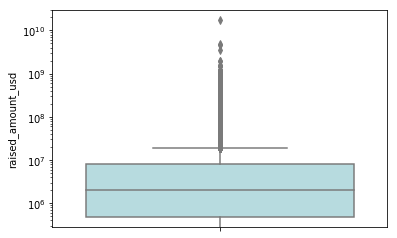

In [67]:
#checking the distribution of raised_amount_usd column

sns.boxplot(y= df['raised_amount_usd'], color = '#b0e0e6')
plt.yscale('log')
plt.show()

In [68]:
#let's look at the summary matrix

df['raised_amount_usd'].describe()

count    7.512400e+04
mean     9.519475e+06
std      7.792778e+07
min      0.000000e+00
25%      4.705852e+05
50%      2.000000e+06
75%      8.000000e+06
max      1.760000e+10
Name: raised_amount_usd, dtype: float64

Note that there's a significant difference between the mean and the median - USD 9.5m and USD 2m. Let's also compare the summary stats across the four categories.

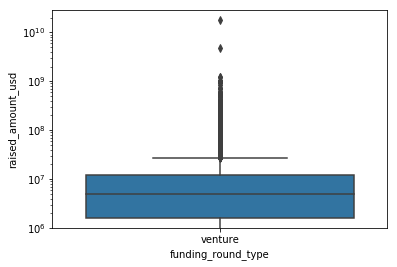

In [96]:
#lets do a distribution analysis for funding round types. 
sns.boxplot(data = df, x = 'funding_round_type', y= 'raised_amount_usd')
plt.yscale('log')
plt.show()

In [75]:
#checking the mean and median across categories. 

zeta = df.pivot_table(values= 'raised_amount_usd', columns= 'funding_round_type', aggfunc= [np.mean, np.median])
zeta

mean                                              \
funding_round_type          angel private_equity           seed       venture   
raised_amount_usd   971573.891136   7.393849e+07  747793.682484  1.172422e+07   

                      median                                      
funding_round_type     angel private_equity      seed    venture  
raised_amount_usd   414906.0     20000000.0  300000.0  5000000.0

Note that there's a large difference between the mean and the median values for all four types. For type venture, for e.g. the median is about 20m while the mean is about 70m.

Thus, the choice of the summary statistic will drastically affect the decision (of the investment type). Let's choose median, since there are quite a few extreme values pulling the mean up towards them - but they are not the most 'representative' values.

In [81]:
#compare the median across all types
df.groupby('funding_round_type')['raised_amount_usd'].median().sort_values(ascending = False)

funding_round_type
private_equity    20000000.0
venture            5000000.0
angel               414906.0
seed                300000.0
Name: raised_amount_usd, dtype: float64

## Country Analysis

In [82]:
#lets filter the data for venture type investments.

df = df[df.funding_round_type == 'venture']

In [85]:
#now lets group by country and then look at total investments. 

country_wise_total = df.groupby('country_code')['raised_amount_usd'].sum().sort_values(ascending = False)
country_wise_total.head(10)

country_code
USA    4.200680e+11
CHN    3.933892e+10
GBR    2.007281e+10
IND    1.426151e+10
CAN    9.482218e+09
FRA    7.226851e+09
ISR    6.854350e+09
DEU    6.306922e+09
JPN    3.167647e+09
SWE    3.145857e+09
Name: raised_amount_usd, dtype: float64

In [86]:
#filtering the top english speaking countries

df = df[(df.country_code == 'USA') | (df.country_code == 'GBR') | (df.country_code == 'IND') | (df.country_code == 'CAN')]
df.head()

,permalink,name,category_list,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd
0,/organization/-fame,#fame,Media,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0
5,/organization/0ndine-biomedical-inc,Ondine Biomedical Inc.,Biotechnology,operating,CAN,/funding-round/954b9499724b946ad8c396a57a5f3b72,venture,21-12-2009,719491.0
7,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0
8,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0
9,/organization/0xdata,H2O.ai,Analytics,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0


In [89]:
#lets do the info on df

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40049 entries, 0 to 88518
Data columns (total 9 columns):
permalink                  40049 non-null object
name                       40049 non-null object
category_list              40049 non-null object
status                     40049 non-null object
country_code               40049 non-null object
funding_round_permalink    40049 non-null object
funding_round_type         40049 non-null object
funded_at                  40049 non-null object
raised_amount_usd          40049 non-null float64
dtypes: float64(1), object(8)
memory usage: 3.1+ MB


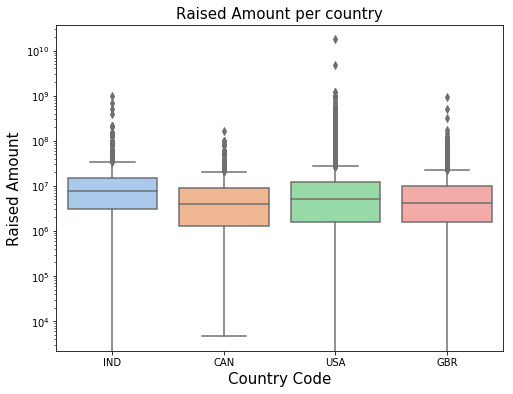

In [98]:
#visualize in a box plot

plt.figure(figsize = (8,6))

sns.boxplot(x = 'country_code', y= 'raised_amount_usd', data = df, palette = 'pastel')
plt.xlabel('Country Code',fontsize = 15)
plt.ylabel('Raised Amount', fontsize = 15)
plt.title('Raised Amount per country', fontsize = 15)
plt.yscale('log')
plt.show()

## Sector Analysis

First, we need to extract the main sector using the column category_list. The category_list column contains values such as 'Biotechnology|Health Care' - in this, 'Biotechnology' is the 'main category' of the company, which we need to use.

Let's extract the main categories in a new column.

In [101]:
df['main_category'] = df['category_list'].apply(lambda x: x.split('|')[0])
df['main_category'].head(10)

0             Media
5     Biotechnology
7         Analytics
8         Analytics
9         Analytics
15             Apps
21        Education
25      Curated Web
29      Curated Web
30      Curated Web
Name: main_category, dtype: object

In [103]:
#lets drop the category_list column
df.drop('category_list', axis = 1, inplace= True)

In [104]:
#check the columns
df.columns

Index(['permalink', 'name', 'status', 'country_code',
       'funding_round_permalink', 'funding_round_type', 'funded_at',
       'raised_amount_usd', 'main_category'],
      dtype='object')

Now, we'll read the mapping.csv file and merge the main categories with its corresponding column.

In [105]:
mapping = pd.read_csv('mapping.csv', sep = ',')
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [107]:
#missing values in mapping
mapping.isnull().sum()

category_list                              1
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [108]:
#remove the missing values
mapping = mapping[~pd.isnull(mapping['category_list'])]
mapping.isnull().sum()

category_list                              0
Automotive & Sports                        0
Blanks                                     0
Cleantech / Semiconductors                 0
Entertainment                              0
Health                                     0
Manufacturing                              0
News, Search and Messaging                 0
Others                                     0
Social, Finance, Analytics, Advertising    0
dtype: int64

In [109]:
#converting the category column to lower case
mapping['category_list'] = mapping['category_list'].str.lower()
df['main_category'] = df['main_category'].str.lower()

In [111]:
#lets look at the heads

print(mapping.head())
print('*****************************************************\n')
print(df.head())

      category_list  Automotive & Sports  Blanks  Cleantech / Semiconductors  \
1                3d                    0       0                           0   
2       3d printing                    0       0                           0   
3     3d technology                    0       0                           0   
4        accounting                    0       0                           0   
5  active lifestyle                    0       0                           0   

   Entertainment  Health  Manufacturing  News, Search and Messaging  Others  \
1              0       0              1                           0       0   
2              0       0              1                           0       0   
3              0       0              1                           0       0   
4              0       0              0                           0       0   
5              0       1              0                           0       0   

   Social, Finance, Analytics, Advertising  

To be able to merge all the main_category values with the mapping file's category_list column, all the values in the  main_category column should be present in the category_list column of the mapping file.

Let's see if this is true.

In [112]:
# values in main_category column in df which are not in the category_list column in mapping file
df[~df['main_category'].isin(mapping['category_list'])]

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category
7,/organization/0xdata,H2O.ai,operating,USA,/funding-round/3bb2ee4a2d89251a10aaa735b1180e44,venture,09-11-2015,20000000.0,analytics
8,/organization/0xdata,H2O.ai,operating,USA,/funding-round/ae2a174c06517c2394aed45006322a7e,venture,03-01-2013,1700000.0,analytics
9,/organization/0xdata,H2O.ai,operating,USA,/funding-round/e1cfcbe1bdf4c70277c5f29a3482f24e,venture,19-07-2014,8900000.0,analytics
47,/organization/100plus,100Plus,acquired,USA,/funding-round/b5facb0d9dea2f0352b5834892c88c53,venture,02-11-2011,500000.0,analytics
136,/organization/1world-online,1World Online,operating,USA,/funding-round/32936e588a134502712877150198a0b3,venture,13-08-2015,2500000.0,analytics
137,/organization/1world-online,1World Online,operating,USA,/funding-round/4e30bd5c85d8163239a3479ec979647a,venture,01-12-2013,500000.0,analytics
138,/organization/1world-online,1World Online,operating,USA,/funding-round/a349bfd7a8d48cfc8b9fdb79480dea7f,venture,02-07-2013,1000000.0,analytics
187,/organization/24-7-card,24/7 Card,closed,USA,/funding-round/0c38194ff2035185c96155dfad18f3bd,venture,21-12-2011,3452941.0,finance
590,/organization/6th-wave-innovations-corporation,6th Wave Innovations Corporation,operating,USA,/funding-round/75d128ac40f9e541a1a11786a47c2952,venture,08-07-2015,2569720.0,nanotechnology
597,/organization/7-billion-people,7 Billion People,closed,USA,/funding-round/58959ed2be7b14abd6beeb20c9eb17ca,venture,13-07-2012,2368902.0,analytics


Notice that values such as 'analytics', 'business analytics', 'finance', 'nanatechnology' etc. are not present in the mapping file.

Let's have a look at the values which are present in the mapping file but not in the main dataframe df.

In [113]:
#check values which are in mapping but not in df
mapping[~mapping['category_list'].isin(df['main_category'])]

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
16,air pollution control,0,0,1,0,0,0,0,0,0
20,alter0tive medicine,0,0,0,0,1,0,0,0,0
22,a0lytics,0,0,0,0,0,0,0,0,1
33,aquaculture,0,0,1,0,0,0,0,0,0
49,b2b express delivery,0,0,0,0,0,0,0,0,1
59,big data a0lytics,0,0,0,0,0,0,0,0,1
64,biomass power generation,0,0,1,0,0,0,0,0,0
69,boating industry,1,0,0,0,0,0,0,0,0
77,building owners,0,0,0,0,0,0,1,0,0
79,business a0lytics,0,0,0,0,0,0,0,0,1


If you see carefully, you'll notice something fishy - there are sectors named alter0tive medicine, a0lytics, waste ma0gement, veteri0ry, etc. This is not a random quality issue, but rather a pattern. In some strings, the 'na' has been replaced by '0'. This is weird - maybe someone was trying to replace the 'NA' values with '0', and ended up doing this.

Let's treat this problem by replacing '0' with 'na' in the category_list column.

In [114]:
#replace 0 with na in category list column
mapping['category_list'] = mapping['category_list'].apply(lambda x: x.replace('0','na'))
mapping['category_list']

1                                      3d
2                             3d printing
3                           3d technology
4                              accounting
5                        active lifestyle
6                            ad targeting
7                      advanced materials
8                        adventure travel
9                             advertising
10                  advertising exchanges
11                   advertising networks
12                  advertising platforms
13                                 advice
14                              aerospace
15                            agriculture
16                  air pollution control
17                             algorithms
18                            all markets
19                           all students
20                   alternative medicine
21                                 alumni
22                              analytics
23                                android
24                                

In [116]:
#now lets merge the two data frames

df = pd.merge(df,mapping, how= 'inner', left_on= 'main_category', right_on= 'category_list')
df.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media,media,0,0,0,1,0,0,0,0,0
1,/organization/90min,90min,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,media,media,0,0,0,1,0,0,0,0,0
2,/organization/90min,90min,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,media,media,0,0,0,1,0,0,0,0,0
3,/organization/90min,90min,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,media,media,0,0,0,1,0,0,0,0,0
4,/organization/all-def-digital,All Def Digital,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,media,media,0,0,0,1,0,0,0,0,0


In [118]:
#drop the category_list column as it is the same as main_category
df.drop('category_list', axis = 1, inplace = True)
df.head()

,permalink,name,status,country_code,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,main_category,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,/organization/-fame,#fame,operating,IND,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10000000.0,media,0,0,0,1,0,0,0,0,0
1,/organization/90min,90min,operating,GBR,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,06-10-2015,15000000.0,media,0,0,0,1,0,0,0,0,0
2,/organization/90min,90min,operating,GBR,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,07-05-2013,5800000.0,media,0,0,0,1,0,0,0,0,0
3,/organization/90min,90min,operating,GBR,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,26-03-2014,18000000.0,media,0,0,0,1,0,0,0,0,0
4,/organization/all-def-digital,All Def Digital,operating,USA,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,06-08-2014,5000000.0,media,0,0,0,1,0,0,0,0,0


In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40034 entries, 0 to 40033
Data columns (total 18 columns):
permalink                                  40034 non-null object
name                                       40034 non-null object
status                                     40034 non-null object
country_code                               40034 non-null object
funding_round_permalink                    40034 non-null object
funding_round_type                         40034 non-null object
funded_at                                  40034 non-null object
raised_amount_usd                          40034 non-null float64
main_category                              40034 non-null object
Automotive & Sports                        40034 non-null int64
Blanks                                     40034 non-null int64
Cleantech / Semiconductors                 40034 non-null int64
Entertainment                              40034 non-null int64
Health                                     40034 

**Converting the 'wide' dataframe to 'long'**

You'll notice that the columns representing the main category in the mapping file are originally in the 'wide' format - Automotive & Sports, Cleantech / Semiconductors etc.

They contain the value '1' if the company belongs to that category, else 0. This is quite redundant. We can as well have a column named 'sub-category' having these values.

Let's convert the df into the long format from the current wide format. First, we'll store the 'value variables' (those which are to be melted) in an array. The rest will then be the 'index variables'.
We will do it using pd.melt().

In [122]:
# store the value and id variables in two separate arrays

# store the value variables in one Series
value_vars = df.columns[9:18]

# take the setdiff() to get the rest of the variables
id_vars = np.setdiff1d(df.columns, value_vars)



# convert into long
long_df = pd.melt(df, 
        id_vars=list(id_vars), 
        value_vars=list(value_vars))

long_df.head()

,country_code,funded_at,funding_round_permalink,funding_round_type,main_category,name,permalink,raised_amount_usd,status,variable,value
0,IND,05-01-2015,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,media,#fame,/organization/-fame,10000000.0,operating,Automotive & Sports,0
1,GBR,06-10-2015,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,media,90min,/organization/90min,15000000.0,operating,Automotive & Sports,0
2,GBR,07-05-2013,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,media,90min,/organization/90min,5800000.0,operating,Automotive & Sports,0
3,GBR,26-03-2014,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,media,90min,/organization/90min,18000000.0,operating,Automotive & Sports,0
4,USA,06-08-2014,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,media,All Def Digital,/organization/all-def-digital,5000000.0,operating,Automotive & Sports,0


In [124]:
#removing the rows whrere the value is 0
long_df = long_df[long_df['value'] == 1]

#drop the value column
long_df = long_df.drop('value', axis = 1)

In [126]:
long_df.head()

,country_code,funded_at,funding_round_permalink,funding_round_type,main_category,name,permalink,raised_amount_usd,status,variable
26611,USA,05-11-2012,/funding-round/2785595770e91ab8fd4854ef125ec563,venture,drones,3D Robotics,/organization/3d-robotics,5000000.0,operating,Automotive & Sports
26612,USA,23-04-2015,/funding-round/7ca0d4dc119b6d65eebfb352c3544542,venture,drones,3D Robotics,/organization/3d-robotics,14000000.0,operating,Automotive & Sports
26613,USA,12-09-2013,/funding-round/d6221c11246b0a536ee2cadd9fcf54d3,venture,drones,3D Robotics,/organization/3d-robotics,30000000.0,operating,Automotive & Sports
26614,USA,25-02-2015,/funding-round/ff3c1d1ae1c3486d775095b093d99b58,venture,drones,3D Robotics,/organization/3d-robotics,50000000.0,operating,Automotive & Sports
26615,USA,13-10-2015,/funding-round/156e4fbce54aca39a8be9a1a2fa1fb77,venture,drones,Cape Productions,/organization/cape-productions,10000000.0,operating,Automotive & Sports


In [128]:
#rename the variable column to sector
long_df = long_df.rename(columns = {'variable': 'sector'})

In [129]:
long_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40034 entries, 26611 to 360289
Data columns (total 10 columns):
country_code               40034 non-null object
funded_at                  40034 non-null object
funding_round_permalink    40034 non-null object
funding_round_type         40034 non-null object
main_category              40034 non-null object
name                       40034 non-null object
permalink                  40034 non-null object
raised_amount_usd          40034 non-null float64
status                     40034 non-null object
sector                     40034 non-null object
dtypes: float64(1), object(9)
memory usage: 3.4+ MB


In [130]:
#lets filter the ivestment amount in the range of 5 million and 15 million

long_df = long_df[(long_df['raised_amount_usd'] >= 5000000) & (long_df['raised_amount_usd'] <= 15000000)]
long_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 13434 entries, 26611 to 360289
Data columns (total 10 columns):
country_code               13434 non-null object
funded_at                  13434 non-null object
funding_round_permalink    13434 non-null object
funding_round_type         13434 non-null object
main_category              13434 non-null object
name                       13434 non-null object
permalink                  13434 non-null object
raised_amount_usd          13434 non-null float64
status                     13434 non-null object
sector                     13434 non-null object
dtypes: float64(1), object(9)
memory usage: 1.1+ MB


In [131]:
#groupby country and sector and compute the sum/count
long_df.groupby(['country_code', 'sector'])['raised_amount_usd'].agg(['count','sum'])

count           sum
country_code sector                                                      
CAN          Automotive & Sports                          2  1.500000e+07
             Cleantech / Semiconductors                 112  1.015888e+09
             Entertainment                               23  1.600221e+08
             Health                                      21  1.683451e+08
             Manufacturing                               31  2.376331e+08
             News, Search and Messaging                  46  4.201211e+08
             Others                                     109  9.261380e+08
             Social, Finance, Analytics, Advertising     78  6.561431e+08
GBR          Automotive & Sports                         16  1.670516e+08
             Cleantech / Semiconductors                 130  1.163990e+09
             Entertainment                               56  4.827847e+08
             Health                                      24  2.145375e+08
             Manufacturing                               42  3.619403e+08
             News, Search and Messaging                  73  6.157462e+08
             Others                                     147  1.283624e+09
             Social, Finance, Analytics, Advertising    133  1.089404e+09
IND          Automotive & Sports                         13  1.369000e+08
             Cleantech / Semiconductors                  20  1.653800e+08
             Entertainment                               33  2.808300e+08
             Health                                      19  1.677400e+08
             Manufacturing                               21  2.009000e+08
             News, Search and Messaging                  52  4.338345e+08
             Others                                     110  1.013410e+09
             Social, Finance, Analytics, Advertising     60  5.505496e+08
USA          Automotive & Sports                        167  1.454104e+09
             Cleantech / Semiconductors                2350  2.163343e+10
             Entertainment                              591  5.099198e+09
             Health                                     909  8.211859e+09
             Manufacturing                              799  7.258553e+09
             News, Search and Messaging                1583  1.397157e+10
             Others                                    2950  2.632101e+10
             Social, Finance, Analytics, Advertising   2714  2.380738e+10

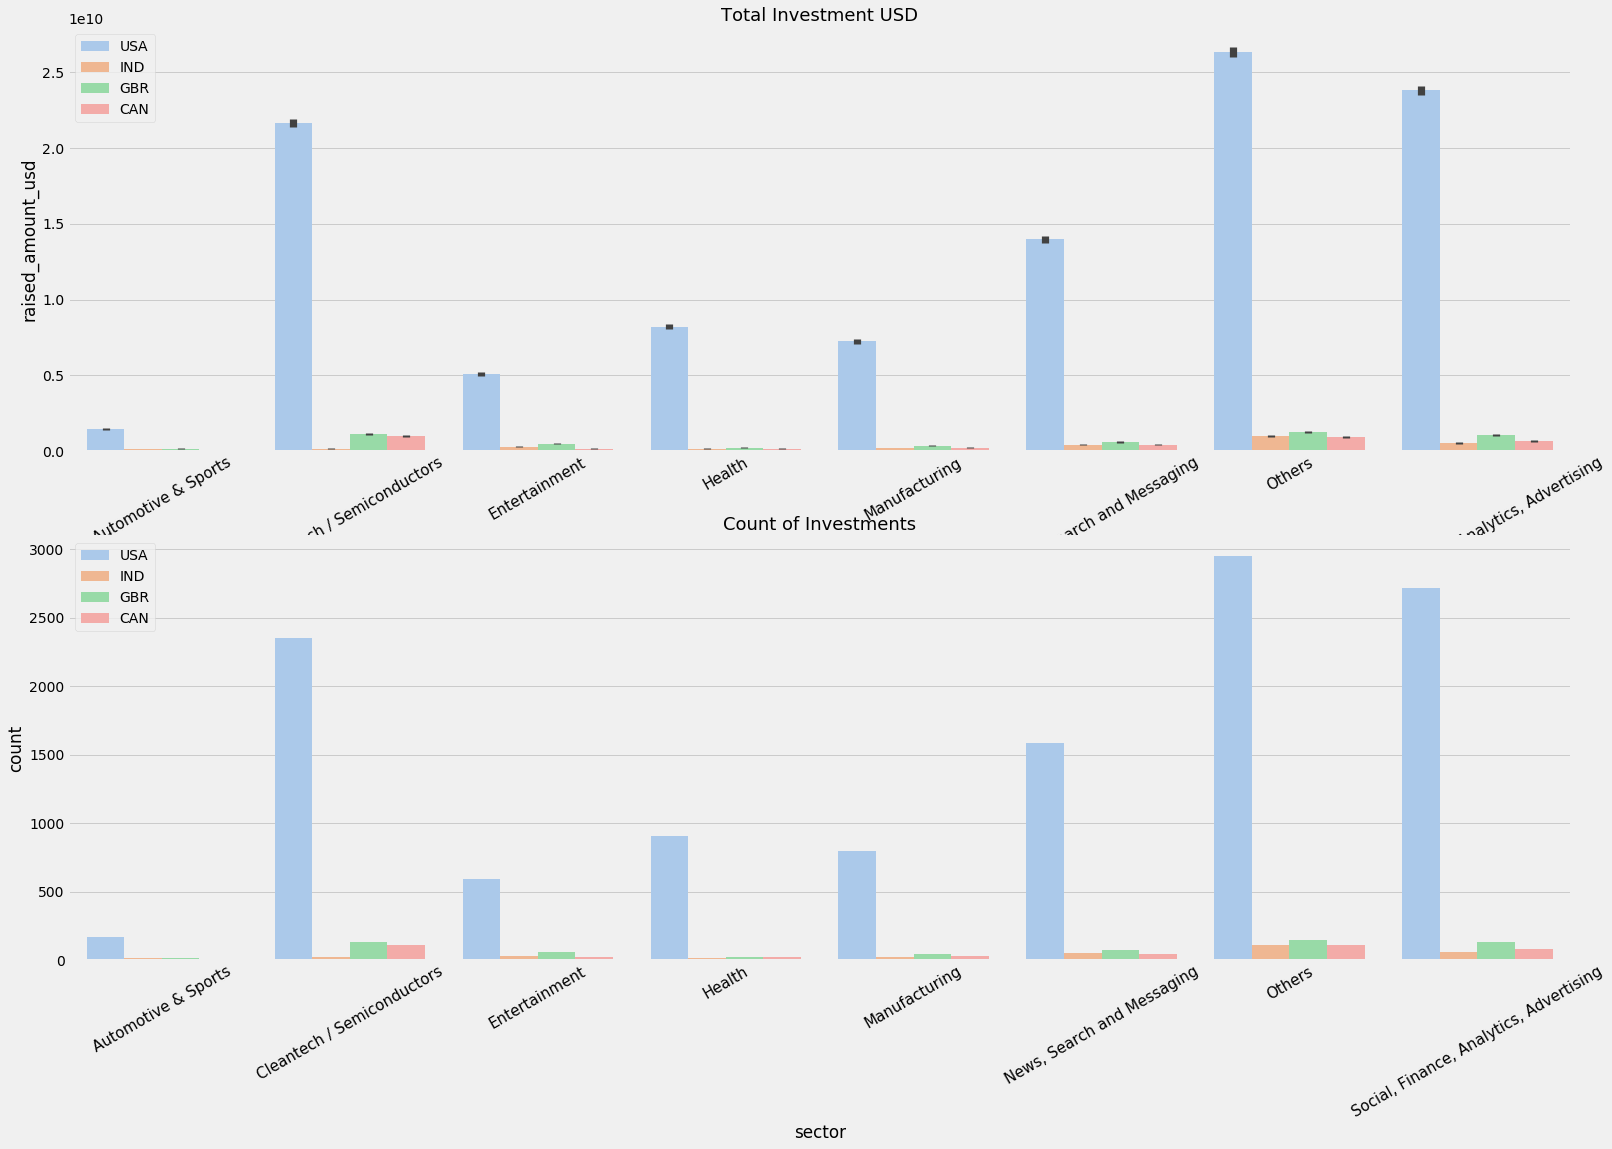

In [145]:
#plotting the raised amount usd and count of investment per country
from matplotlib import style
style.use('fivethirtyeight')

plt.figure(figsize = (24,16))
plt.subplot(2,1,1)
q = sns.barplot(x = 'sector', y= 'raised_amount_usd', data = long_df, hue= 'country_code', estimator= np.sum, palette= 'pastel')
q.set_xticklabels(q.get_xticklabels(), rotation = 30, fontsize = 15)
plt.legend(loc= 'upper left')
plt.title('Total Investment USD', fontsize = 18)

plt.subplot(2,1,2)
p = sns.countplot(x = 'sector', hue = 'country_code', data = long_df, palette = 'pastel')
p.set_xticklabels(p.get_xticklabels(), rotation = 30, fontsize = 15)
plt.legend(loc = 'upper left')
plt.title('Count of Investments', fontsize = 18)

plt.show()

## Conclusion

**We can see that the top country in which most investments happen is USA.**

**And the top sectors to invest in are others, social, Finance, Analytics, Advertising, Cleantech/Semiconductors***